In [21]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform
import process
import random
import importlib
from haversine import haversine
import pandas as pd
importlib.reload(process)

<module 'process' from '/Users/teoshuqi/Documents/cc_fraud/process.py'>

In [2]:
data = pd.read_csv('fraudTrain.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Model ##

In [22]:
TARGET = 'is_fraud'
SEED=42
y = data.iloc[:5000][TARGET]
X = data.iloc[:5000].drop(TARGET, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Random Forest #

In [6]:
N = 10
final_results = pd.DataFrame(np.zeros((N, 6)),
             columns=['n_estimator', 'max_depth', 'min_samples_leaf', 'precision', 'recall', 'f1_score'])
for i in range(N):
  n_estimator = random.choice(np.arange(50, 300))
  max_depth = random.choice(np.arange(2,20))
  min_samples_leaf = random.choice(np.arange(2,200))
  print(n_estimator, max_depth, min_samples_leaf)

  feature_logic = process.FeatureEngineering()
  added_features = feature_logic.transform(X)
  final_x, variables = feature_logic.preprocess(added_features)

  clf = RandomForestClassifier(n_jobs=-1, 
                              class_weight='balanced_subsample',
                              random_state=SEED,
                              n_estimators=n_estimator,
                                max_depth=max_depth,
                                min_samples_leaf=min_samples_leaf
                              )

  cv_results = cross_validate(clf, final_x, y, cv=7, error_score='raise',
                              scoring=('recall', 'precision', 'f1'), n_jobs=-1)
  recall = np.mean(cv_results['test_recall'])
  precision = np.mean(cv_results['test_precision'])
  f1_score = np.mean(cv_results['test_f1'])
  print(f1_score, recall, precision)
  final_results.iloc[i, :] = [n_estimator, max_depth, min_samples_leaf, precision, recall, f1_score]
final_results


282 3 65


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.33586402950743377 0.8928571428571429 0.21087385972042577
135 12 126


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.3303929892470268 0.8995535714285714 0.20382883653770217
268 18 180


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.30656158334619404 0.9017857142857143 0.18629996544169572
78 12 199


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.28830753629854006 0.8995535714285714 0.1729825335089661
148 14 40


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.49592147367247164 0.8616071428571429 0.355874413833034
236 9 144


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.31945698971415776 0.8950892857142857 0.19588138997719584
65 4 42


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.3471517392182769 0.8839285714285714 0.22069671695122678
298 13 189


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.3044792579447028 0.9017857142857143 0.18455996620836493
184 2 8


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.2909211232699848 0.890625 0.17872631880786122
294 13 164


/Users/teoshuqi/Documents/SSG Technical Assessment/qn2/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.31110970043002517 0.8995535714285714 0.1893709463380934


,n_estimator,max_depth,min_samples_leaf,precision,recall,f1_score
0,282.0,3.0,65.0,0.210874,0.892857,0.335864
1,135.0,12.0,126.0,0.203829,0.899554,0.330393
2,268.0,18.0,180.0,0.186300,0.901786,0.306562
3,78.0,12.0,199.0,0.172983,0.899554,0.288308
4,148.0,14.0,40.0,0.355874,0.861607,0.495921
5,236.0,9.0,144.0,0.195881,0.895089,0.319457
6,65.0,4.0,42.0,0.220697,0.883929,0.347152
7,298.0,13.0,189.0,0.184560,0.901786,0.304479
8,184.0,2.0,8.0,0.178726,0.890625,0.290921
9,294.0,13.0,164.0,0.189371,0.899554,0.311110


In [23]:
feature_logic = process.FeatureEngineering()
added_features = feature_logic.transform(X_train)
final_x, variables = feature_logic.preprocess(added_features)


clf = RandomForestClassifier(n_jobs=-1, 
                            class_weight='balanced_subsample',
                            random_state=SEED,
                            n_estimators=268,
                            max_depth=18,
                            min_samples_leaf=180
                            )
clf.fit(final_x, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=18,
                       min_samples_leaf=180, n_estimators=268, n_jobs=-1,
                       random_state=42)

In [25]:
added_features_test = feature_logic.transform(X_test)
final_x_test, _ = feature_logic.preprocess(added_features_test)
y_pred = clf.predict(final_x_test)

# get predictions
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
print(precision, recall)

0.0 0.0


In [28]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
cat_vars = ['gender', 'category']
real_vars = [i for i in added_features_test.columns if i not in cat_vars]
X_cat = added_features_test[cat_vars]
X_real = added_features_test.drop(cat_vars, axis=1).to_numpy()

encoder = OneHotEncoder(sparse_output=False).fit(X_cat)
cat_x = encoder.transform(X_cat)
# # min max scaling
# if self.scaler is None:
#     self.scaler = MinMaxScaler().fit(X_real)
# real_x = self.scaler.transform(X_real)
# final_x = np.concatenate((cat_x, real_x), axis=1).tolist()
# variables = self.encoder.get_feature_names_out(cat_vars).tolist() + real_vars

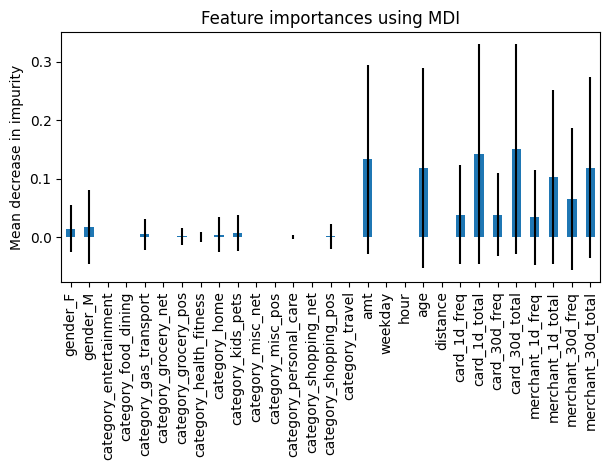

In [26]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=variables)
print()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()